<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [25]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import os
from spacy.tokenizer import Tokenizer


from bs4 import BeautifulSoup

## 1) *Clean:* Job Listings from indeed.com that contain the title "Data Scientist" 

You have `job_listings.csv` in the data folder for this module. The text data in the description column is still messy - full of html tags. Use the [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) library to clean up this column. You will need to read through the documentation to accomplish this task. 

In [26]:
# Reading in the file of the data

# getting the path to the file
PATH = os.path.join("data", "job_listings.csv")

df = pd.read_csv(PATH)
df.head(3)

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level


In [27]:
soup = BeautifulSoup(df.iloc[0]["description"], from_encoding='utf-8')
text = (soup.get_text())
print(text)
#type(text)

b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


In [28]:
# I am using the BeautifulSoup here
# I will make a method to run on each column
def remove_tags(text):
    soup = BeautifulSoup(text)
    theString = soup.get_text()
    return theString

In [29]:
# Not useing this right now
#from bs4 import BeautifulSoup
#import requests
#
###### Your Code Here #####
#raise Exception("\nThis task is not complete. \nReplace this line with your code for the task.")
#                


In [30]:
df["clean"] = df["description"].apply(remove_tags)
df.head(2)

,Unnamed: 0,description,title,clean
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"b""Job Requirements:\nConceptual understanding ..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"b'Job Description\n\nAs a Data Scientist 1, yo..."


b"Job Requirements:\nConceptual understanding in Machine Learning models like Nai\xc2\xa8ve Bayes, K-Means, SVM, Apriori, Linear/ Logistic Regression, Neural, Random Forests, Decision Trees, K-NN along with hands-on experience in at least 2 of them\nIntermediate to expert level coding skills in Python/R. (Ability to write functions, clean and efficient data manipulation are mandatory for this role)\nExposure to packages like NumPy, SciPy, Pandas, Matplotlib etc in Python or GGPlot2, dplyr, tidyR in R\nAbility to communicate Model findings to both Technical and Non-Technical stake holders\nHands on experience in SQL/Hive or similar programming language\nMust show past work via GitHub, Kaggle or any other published article\nMaster's degree in Statistics/Mathematics/Computer Science or any other quant specific field.\nApply Now"


## 2) Use Spacy to tokenize the listings 

In [31]:

# Will be using spacy to tokenize the listings
nlp = spacy.load("en_core_web_lg")


In [32]:
def tokenize_text(text):
    # using the full tokenizer from spacy
    doc = nlp(text)
    tokens = [token.lemma_.lower() for token in doc if token.is_stop == False and token.is_punct == False ]
    return tokens

In [9]:
# using the spacy tokenizer to break the words into the list Will use this with both the
# Countvectorizer and the Tf/idf

## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [33]:
# Getting the list of the values
# from the clean column
word_list = df["clean"].values.tolist()
len(word_list)


426

In [34]:
# Doing the count vectorizer
c_vectorizer = CountVectorizer( tokenizer=tokenize_text, max_df=1, min_df=.2 )
dtm = c_vectorizer.fit_transform(word_list[0:3])

In [35]:
# creating a dataFram of just the first three rows
v_df = pd.DataFrame(dtm.toarray(), columns=c_vectorizer.get_feature_names() )
print(v_df.shape)
v_df

(3, 340)


,+,1,2,accolade,according,accuracy,act,actionable,advanced,afraid,...,us\ncreate,usable,user,way,way.\nwe,we\xe2\x80\x99re,willingness,world,writing,year
0,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,2,0,1,1,1,1,0,0,2,...,1,1,1,1,1,1,1,2,1,1
2,0,0,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
# Now will do the same but for the whole dataframe
# Will be redoing the fit on the whole list of all the documents,
# and then do the transform on the whole set
count_vect = CountVectorizer( tokenizer=tokenize_text, max_df=.95, min_df=15)

In [37]:
# Doing the fit and the transform 
d_matrix  =  count_vect.fit_transform(word_list)


In [38]:
print("The shape is: ", d_matrix.shape)
type(d_matrix)

The shape is:  (426, 1094)


scipy.sparse.csr.csr_matrix

## 4) Visualize the most common word counts

In [39]:
# Building a function that will add up the occurrences in the matrix and then will 
# connect them with the names
# and then will sort then in descending order
# Will return a list of tuples
def sort_names(matrix,count_vectorizer,  number_to_return):
    # the count_vectorizer
    sum_mat  = matrix.sum(axis=0)
    word_frequency = [(word, sum_mat[0, the_index]) for word, the_index in count_vectorizer.vocabulary_.items()]
    # Doing sorting of the words
    word_frequency = sorted(word_frequency, key=lambda x: x[1], reverse=True)

    return word_frequency[0:number_to_return]



In [17]:
# Calling the method above to pull out the list and then visualize it using the squarify
# I will visualize the 25 most common word

# Doing some imports first
import squarify


In [40]:
# calling the method
word_frequency = sort_names(d_matrix, count_vect, number_to_return=25)

In [41]:
# making two lists
the_words = [word for word , count in word_frequency]
the_count = [count for word, count in word_frequency]

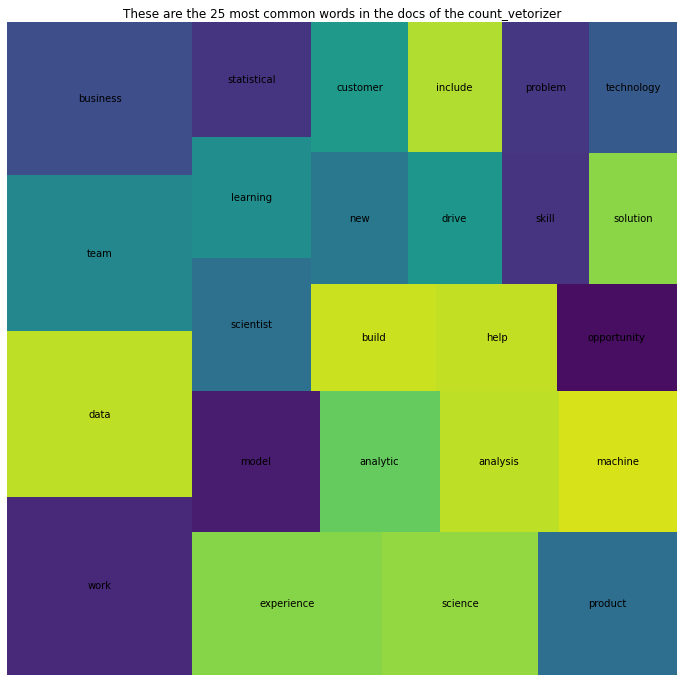

In [42]:
plt.figure(figsize=(12,12))
squarify.plot(sizes=the_count, label=the_words)
plt.axis("off")
plt.title("These are the 25 most common words in the docs of the count_vetorizer")
plt.show()

In [43]:
# Made this function that will get the info ready to run the plotting
def get_data(matrix, vectorizer,  number_to_return):
    the_list =  sort_names(matrix ,vectorizer,  number_to_return)
    the_words = [word for word , count in the_list]
    the_count = [count for word, count in the_list]
    return the_words, the_count

In [44]:
names , the_height = get_data( d_matrix,count_vect, 10)

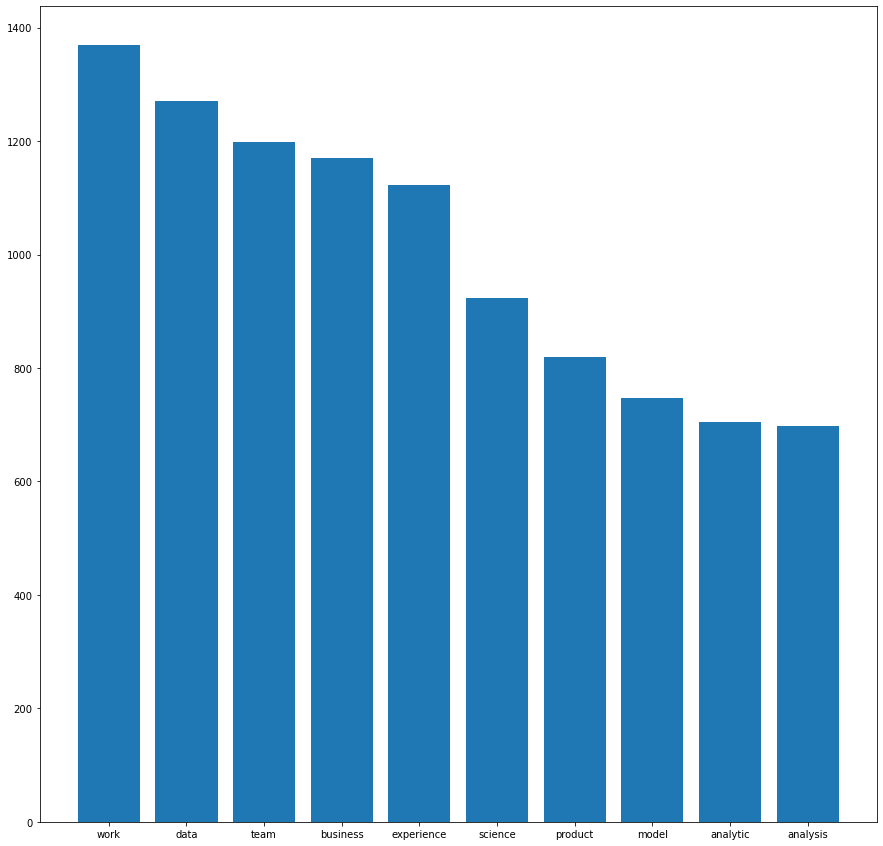

In [45]:
# visualizing the 10  most common words in matplotlib
plt.figure(figsize=(15,15))
plt.bar(x=names, height=the_height)
plt.show()

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [46]:
# Doing the tfifdVectorizer to the feature matrix
td = TfidfVectorizer(tokenizer=tokenize_text, max_df=.95, min_df=15)

In [47]:
# Getting the feture matrix
tfidf_matrix = td.fit_transform(word_list)

In [64]:
# Just picking four rows to show the dataframe with just four 
# rows
t = tfidf_matrix.todense()
t = t[0:4]

In [65]:
type(t)

numpy.matrix

In [67]:
# show just part of the matrix from the tfidf
df = pd.DataFrame(data=t, columns=td.get_feature_names())
df

,$,+,1,10,100,2,2019,3,4,40,...,world\xe2\x80\x99s,worldwide,write,writing,year,years\xe2\x80\x99,york,you\'ll,you\xe2\x80\x99ll,you\xe2\x80\x99re
0,0.000000,0.000000,0.000000,0.0,0.0,0.172711,0.0,0.0,0.0,0.0,...,0.0,0.0,0.109521,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.040999,0.154597,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.083560,0.08729,0.029421,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.256313,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.00000,0.036662,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [68]:
# Doing the nearest neighbors on the tfidf_matrix
from sklearn.neighbors import NearestNeighbors

In [75]:
neighbor_model = NearestNeighbors(algorithm="ball_tree", n_neighbors=5)

In [76]:
# Fitting on all the data of the tfidf
neighbor_model.fit(tfidf_matrix)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [83]:
IDEAL_JOB = """
            Work at home. You Need to know machine learning, and able to use neural networks.  You must be a self starter and be able to work well with others on your team.  An understanding of Pandas, Python, C, and other programming languages is a plus.
    """
 

In [77]:
my_resume= """
            Data Scientist
Email: rchiro@gmail.coml | Phone 801-491-7233 | Springville, Utah
Portfolio: http://medium.com/@Richard_Olson  | GitHub: https://github.com/richardOlson  | 
 LinkedIn: https://www.linkedin.com/in/richard-olson-6237b21a1/

SKILLS 
Python |Pandas | Flask | Java | Flask | C | C++ | SQL | Plotly Dash | API | JSON | NoSQL

PROJECTS
Causes of Noise in New York City								                                  GitHub
An exploration of the 311 calls for the year 2017
Pandas | Data Visualization | Data Storytelling 
Determined the most common causes of noise complaints for each month.
Viewed how the types of noise complaints varied at different times of day.

Predictability of NFL Plays									                                  GitHub
Pandas | User of Different Predictive Models | Plotly Dash  
Used Play by Play data to train and predict if the next play is a “Pass or Run” 
Performed data wrangling to have data that was useful for predicting 
Built an app with Plotly Dash deployed on Heroku.  (May need to wait a little bit to wake the dyno) 

Twitter Predictor         										                                 GitHub
An app to predict who would more likely tweet a phrase between two users
Flask | Heroku 
Built an app that integrated a database using Flask and flask-sqlalchemy
Deployed app on Heroku  (May need to wait a little to allow the dyno to wake in order to run)

EXPERIENCE
Springville Chiropractic					                                  Oct 2003 - Present
Chiropractor
Interact with patients and help them with their health needs. 
Managed the business needs of the practice 

EDUCATION
Lambda School, -- Online									Oct 2019 -  April 2021
Data Science
Lambda School is a 9+ month ( part-time 18 months)  computer science & software engineering program that provides an immersive hands-on curriculum with a track focused on Data Science.   Students in this program..
Develop a solid foundation of descriptive and predictive statistics, including linear algebra, linear regression, hypothesis testing, storytelling with data, and more.
Gain hands-on experience engaging with machine learning, being able to understand unsupervised learning, natural language, and neural networks.
Complete a deep dive into Data Engineering, working with databases, productization and big data.
Serve as a data scientist on a ready to deploy project, working alongside UX designers, web developers, and mobile developers to bring the project to fruition.


    """

In [87]:
# Will tokenize both the resume and the job description
resume_tokenized = tokenize_text(my_resume)
job_descr_tokenized = tokenize_text(IDEAL_JOB)

# Will run these through the tfidf vectorizer
resume_vec = td.transform([my_resume])
job_descr_vec = td.transform([IDEAL_JOB])

In [98]:
# Will try to find out what are the documents that are the most similar to my resume
# and the perfect job description

resume_results = neighbor_model.kneighbors(resume_vec)
job_desc_results = neighbor_model.kneighbors(job_descr_vec)


In [97]:
# Getting the three most closest ones
#print(job_desc_results.shape)
print("The 5 closest documents to the Perfect job description")
for doc_id in job_desc_results[1][0]:
    print("-------")
    print("DOC", doc_id)
    print( word_list[doc_id][0:200])    

The 5 closest documents to the Perfect job description
-------
DOC 403
b"About Us\nInterested in working for a human-centered technology company that prides itself on using modern tools and technologies? Want to be surrounded by intensely curious and innovative thinkers?
-------
DOC 123
b'Motiion is a technology and data company for the food industry. We believe in transparency, diversity, merit and fostering a culture of accountability, personal impact and career growth.\n\nAs a mem
-------
DOC 23
b'Motiion is a technology and data company for the food industry. We believe in transparency, diversity, merit and fostering a culture of accountability, personal impact and career growth.\n\nAs a mem
-------
DOC 382
b"DATA SCIENTIST\nJOB DESCRIPTION\n\nABOUT US\n\nAmplion synthesizes the world\xe2\x80\x99s biomedical knowledge to accelerate Precision Medicine and enable confident strategic decisioning in drug and
-------
DOC 424
b"SENIOR DATA SCIENTIST\nJOB DESCRIPTION\n\nABOUT US\n\nAmplio

In [100]:
resume_results

(array([[1.24607665, 1.2514765 , 1.25492491, 1.25493595, 1.25609435]]),
 array([[305, 399, 349, 351, 401]], dtype=int64))

In [102]:
# Now getting the closest documents to the resume
print("The 5 documents that are closest to my Resume are:")
for doc_id in resume_results[1][0]:
    print("-----")
    print("DOC", doc_id)
    print(word_list[doc_id][0:200])

The 5 documents that are closest to my Resume are:
-----
DOC 305
b'There\xe2\x80\x99s a lot of work around Osmo for someone with a love of statistics.\n\nFor one there\xe2\x80\x99s anonymous player statistics that need to be distilled into understanding of what wor
-----
DOC 399
b'By trade we are a technology company, but if you ask anyone that works here, they\xe2\x80\x99ll tell you we are a people company. As the industry leader in Accounts Payable (AP) Automation, AvidXcha
-----
DOC 349
b"About Care/of\n\nCare/of (takecareof.com ( https://takecareof.com/ )) is a fast-growing, venture-backed wellness startup. We make it easier and more enjoyable to shop for vitamins (and maybe even a 
-----
DOC 351
b"What you\xe2\x80\x99ll be doing...\nThis position will drive profitable growth and business innovation by applying cutting edge machine learning techniques and AI technology. It will independently l
-----
DOC 401
b"about dscout\nWe are dscout. At our core, we are People Nerds. We empower

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 